# Data analysis

Import important libraries

In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import operator


First, we create a list where all functions are stored.


In [2]:
bookFunctions = []
with open('phrase_functions_Genesis.txt') as inputfile:
    for line in inputfile:
        bookFunctions.append(line.strip().split(' '))

Now, we can extract the unique function names. This is done in a set because a set does not contain dupliates. Hereafter, we sort these function names and put it in a list for a pandas df.

In [3]:
setFunctions = set()
for item in bookFunctions:
    for abstract in item:
        setFunctions.add(abstract)

uniqueFunctions = sorted(list(setFunctions))


To create a pandas dataframe, we need to know in which clause which functionname occurs. Therefore, each row represents a claus and a number in a column represents the occurence of a function in a clause.

In [6]:
zeromatrix= np.zeros((len(bookFunctions), len(uniqueFunctions)))

for row,item in enumerate(bookFunctions):
    for functionName in item:
        column = uniqueFunctions.index(functionName)
        zeromatrix[row][column]+=1
        
df = pd.DataFrame(zeromatrix, columns = uniqueFunctions)
df.index.name = "Clause"


If you want to see the datafile, type df in the above cell.

# Frequency of functions in the clauses

Here, I look at the top 10 most frequent functions in the clauses

In [7]:
frequencyFunction = df.sum(0).to_dict()
sorted(frequencyFunction.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('Pred', 2630.0),
 ('Conj', 2548.0),
 ('Subj', 1349.0),
 ('Cmpl', 1219.0),
 ('Objc', 905.0),
 ('PreC', 453.0),
 ('Rela', 195.0),
 ('Time', 169.0),
 ('Adju', 166.0),
 ('Loca', 118.0)]

Since we got absolute frequency (which is just counting the amount that a function occurs in the clauses), we can calculate the relative frequency of functions. This means that we just divide the total number of occurences by the total number of clauses. 

In [8]:
relativeFrequency = frequencyFunction
for key, value in frequencyFunction.items():
    relativeFrequency[key] = value / len(df)
sorted(relativeFrequency.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('Pred', 0.81677018633540377),
 ('Conj', 0.79130434782608694),
 ('Subj', 0.418944099378882),
 ('Cmpl', 0.37857142857142856),
 ('Objc', 0.28105590062111802),
 ('PreC', 0.1406832298136646),
 ('Rela', 0.060559006211180127),
 ('Time', 0.052484472049689444),
 ('Adju', 0.051552795031055899),
 ('Loca', 0.036645962732919257)]

Now that we have looked at the number of occurences of function names, we can also look at how many functions are given in each clause on average.

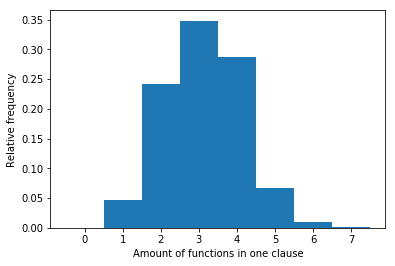

In [22]:
amountFunctions = np.asarray(df.sum(1))
plt.hist(amountFunctions,bins=np.arange(9)-0.5, normed=True)
plt.xlabel('Amount of functions in one clause')
plt.ylabel('Relative frequency')
plt.show()

In [23]:
counter = collections.Counter(amountFunctions)
print(counter)

Counter({3.0: 1121, 4.0: 922, 2.0: 777, 5.0: 213, 1.0: 149, 6.0: 32, 7.0: 6})


Now, we can compute some statistics over the number of functions given in one clause

In [27]:
print("Mean: "+str(np.mean(amountFunctions))+", Variance: "+str(np.var(amountFunctions)))


Mean: 3.12204968944, Variance: 1.08168772424


# Pattern recognision


Next step is finding patterns in the clauses. There are a lot of clauses which have the same functions in it. Therefore, we want to know how often some combination of functions (not looking at the order, only if it occurs or not) occurs in the data.


In [46]:
dfCount = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'})
dfCount

,Adju,Cmpl,Conj,Loca,Modi,Nega,Objc,PreC,PreO,PreS,Pred,Rela,Subj,Time,count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,84
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,19
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,9


As you can see in the data above, the number counts indicates the frequency some combination of functions occurs. Of course we can sort this and print the top 20

In [47]:
dfCount.sort_values(["count"], ascending=False)[:20]

,Adju,Cmpl,Conj,Loca,Modi,Nega,Objc,PreC,PreO,PreS,Pred,Rela,Subj,Time,count
53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,415
156,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,300
158,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,280
55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,248
72,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,191
74,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,137
169,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,131
64,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,94
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,84
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,65


Again we can make this relative

In [48]:
dfCount['count'] = dfCount['count']/len(df)
dfCount.sort_values(["count"], ascending=False)[:20]

,Adju,Cmpl,Conj,Loca,Modi,Nega,Objc,PreC,PreO,PreS,Pred,Rela,Subj,Time,count
53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.128882
156,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.093168
158,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.086957
55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.077019
72,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.059317
74,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.042547
169,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.040683
64,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.029193
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.026087
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.020186
